In [ ]:
## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sheets = pd.read_excel('Regional Sales Dataset.xlsx',sheet_name = None)

In [6]:
# Assign dataframe to each sheet

In [7]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [8]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [9]:
df_sales.shape

(64104, 12)

In [10]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [11]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [12]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_customers.isnull().sum()


Customer Index    0
Customer Names    0
dtype: int64

In [14]:
df_products.isnull().sum()


Index           0
Product Name    0
dtype: int64

In [15]:
df_regions.isnull().sum()


id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_reg.isnull().sum()


0
State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

Data Cleaning And Wrangling

In [18]:
# Merge With Customers

df = df_sales .merge(df_customers,
                    how ='left',
                    left_on = 'Customer Name Index',
                    right_on= 'Customer Index'
                    )

In [19]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [20]:
# Merge With Products

df = df.merge(
    df_products,
    how="left",
    left_on="Product Description Index",
    right_on="Index"
)


In [21]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [22]:
# Merge With Region

df = df.merge(
    df_regions,
    how ='left',
    left_on = 'Delivery Region Index',
    right_on= 'id'
)



In [23]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [24]:
df_state_reg = pd.read_excel(
    "Regional Sales Dataset.xlsx",
    sheet_name="State Regions",
    header=1   # 👈 second row ko header maanega
)

print(df_state_reg.columns)


Index(['State Code', 'State', 'Region'], dtype='object')


In [25]:
# Merge With State Region

df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how="left",
    left_on="state_code",
    right_on="State Code"
)

In [26]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [27]:
# Merge With Budget

df = df.merge(
    df_budgets,
    how="left",
    on = 'Product Name'
)

In [28]:
df.to_csv('file.csv')

In [29]:
#Customer index
#Index
#id
#State Code


#Clean up redundant Column

cols_to_drop =['Customer Index','Index','id','State Code']
df= df.drop(columns = cols_to_drop,errors= 'ignore')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [30]:
# Conert all columns to lower case

In [31]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [32]:
#Keep imp col. and delete the col that we don't want

cols_to_keep =[
    'ordernumber',
    'orderdate',
    'customer name index',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total', 
    'total unit cost',
    'county',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
    
]
df= df[cols_to_keep]

In [33]:
df.head()

,ordernumber,orderdate,customer name index,channel,product name,order quantity,unit price,line total,total unit cost,county,state_code,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,42,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [34]:
#Rename cols

df=df.rename(columns={
    'ordernumber':'order_name',
    'orderdate':'order_date',
    'customer name index':'customer_name_index',
    'channel':'channel',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue', 
    'total unit cost':'cost',
    'county':'county',
    'state_code':'state_code',
    'state':'state_name',
    'region':'region',
    'latitude':'latitude',
    'longitude':'longitude',
    '2017 budgets':'budget'
    
})

In [35]:
#Blank Out budgets for non-2017 order
df.loc[df['order_date'].dt.year != 2017,'budget'] =pd.NA

df[['order_date','product_name','revenue','budget']].head(5)


,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [36]:
df[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [37]:
# Filter the data set to include only records from year 2017

df_2017 = df[df['order_date'].dt.year ==2017]

In [38]:
df.isnull().sum()

order_name                 0
order_date                 0
customer_name_index        0
channel                    0
product_name               0
order_quantity             0
unit_price                 0
revenue                    0
cost                       0
county                     0
state_code                 0
state_name                 0
region                     0
latitude                   0
longitude                  0
budget                 48841
dtype: int64

In [39]:
df_2017.head()

,order_name,order_date,customer_name_index,channel,product_name,order_quantity,unit_price,revenue,cost,county,state_code,state_name,region,latitude,longitude,budget
46363,SO - 0002544,2017-01-01,107,Wholesale,Product 30,6,1239.5,7437.0,1028.785,Hudson County,NJ,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,116,Wholesale,Product 13,5,1829.1,9145.5,1207.206,Mesa County,CO,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,45,Wholesale,Product 15,9,2412.0,21708.0,1664.280,Los Angeles County,CA,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,169,Wholesale,Product 8,8,904.5,7236.0,750.735,Dubuque County,IA,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,20,Wholesale,Product 2,12,1112.2,13346.4,811.906,Hernando County,FL,Florida,South,28.47689,-82.52546,3050087.565


Feature Engineering

In [42]:
df['total_cost'] = df['order_quantity'] * df['cost']

In [ ]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue']*100

#EDA

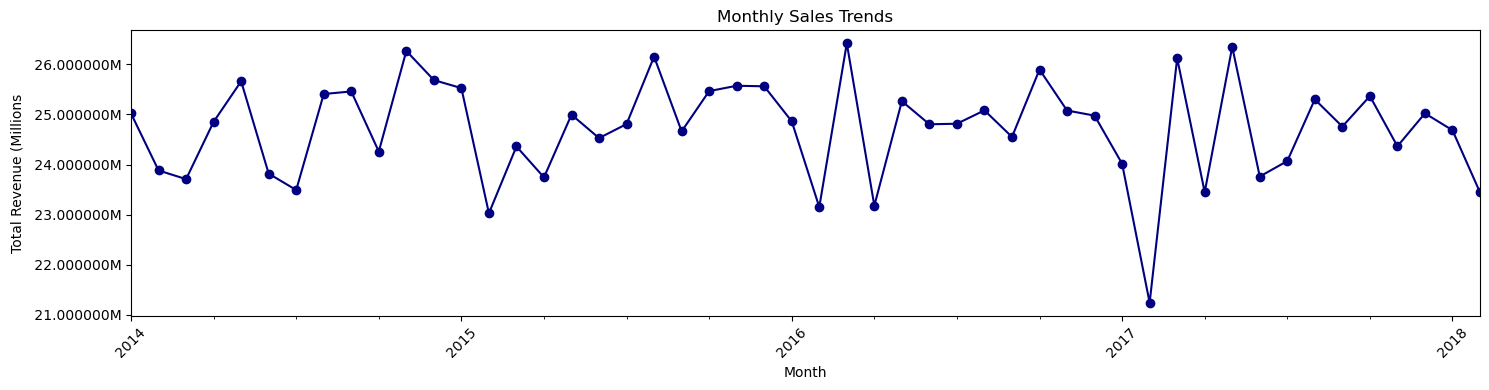

In [46]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x,pos: f'{x/1e6: 1f}M')

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
df.head()

,order_name,order_date,customer_name_index,channel,product_name,order_quantity,unit_price,revenue,cost,county,state_code,state_name,region,latitude,longitude,budget,total_cost,order_month
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,2014-01
1,SO - 0003378,2014-01-01,96,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,2014-01
2,SO - 0005126,2014-01-01,8,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,West,37.66243,-121.87468,NaN,4108.440,2014-01
3,SO - 0005614,2014-01-01,42,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,2014-01
4,SO - 0005781,2014-01-01,73,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,2014-01


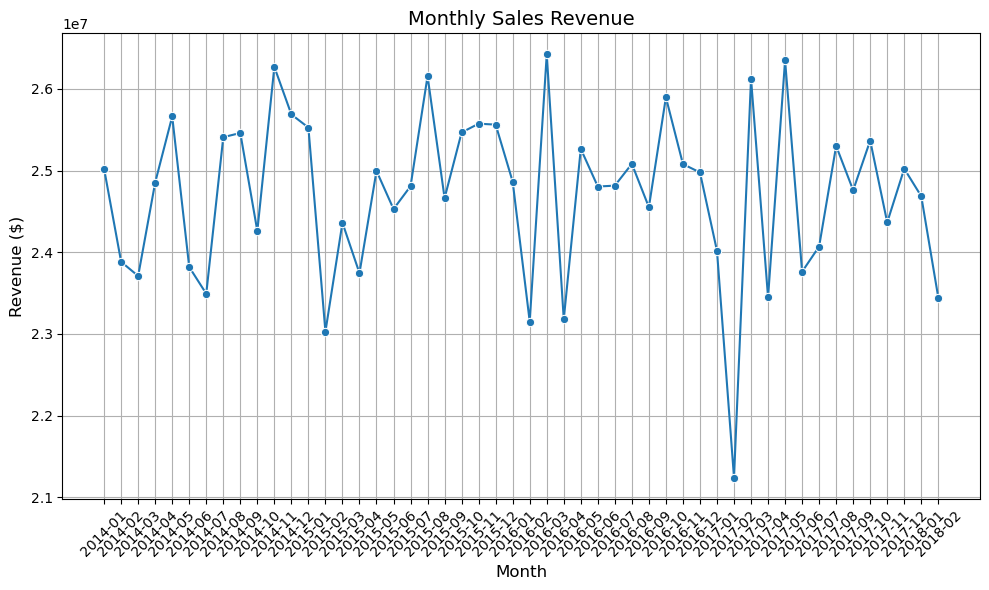

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Create year-month column
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)

# Aggregate monthly revenue
monthly_sales = (
    df.groupby('year_month')['revenue']
      .sum()
      .reset_index()
)

# Create line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='revenue', marker='o')

plt.title("Monthly Sales Revenue", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [59]:
# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out Jan 2018 and Feb 2018
df_new = df[~(
    (df['order_date'].dt.year == 2018) &
    (df['order_date'].dt.month.isin([1, 2]))
)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\3195406508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\3195406508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


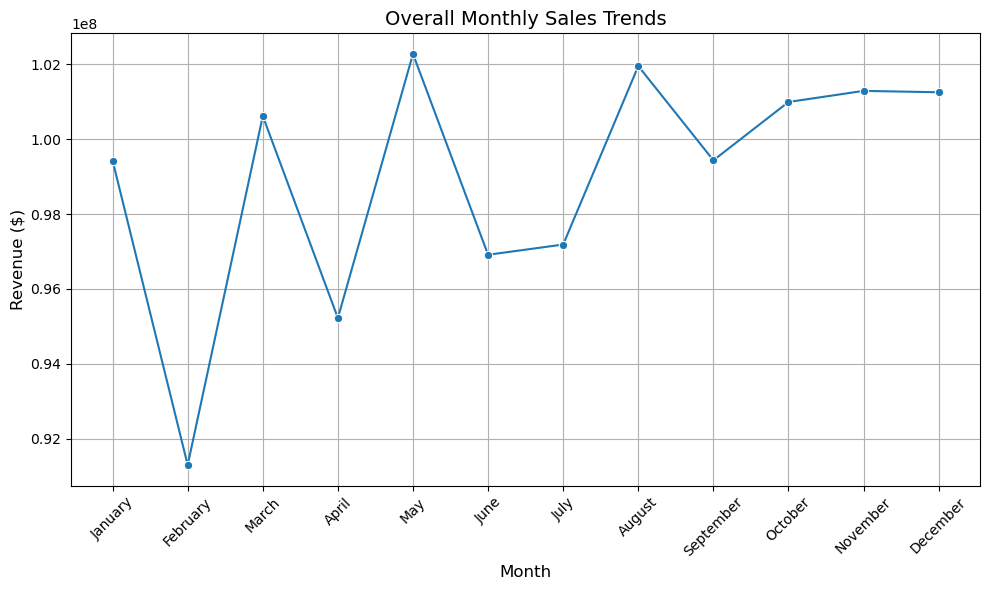

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract calendar month name
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Month order
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

# Aggregate revenue by calendar month (all years combined)
monthly_seasonality = (
    df_new.groupby('month')['revenue']
      .sum()
      .reindex(month_order)
      .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_seasonality, x='month', y='revenue', marker='o')
plt.title("Overall Monthly Sales Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out Jan 2018 and Feb 2018
df_new = df[~(
    (df['order_date'].dt.year == 2018) &
    (df['order_date'].dt.month.isin([1, 2]))
)]


Top 10 Products by Revenue

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\910783954.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products, x='product_name', y='revenue', palette='tab10')


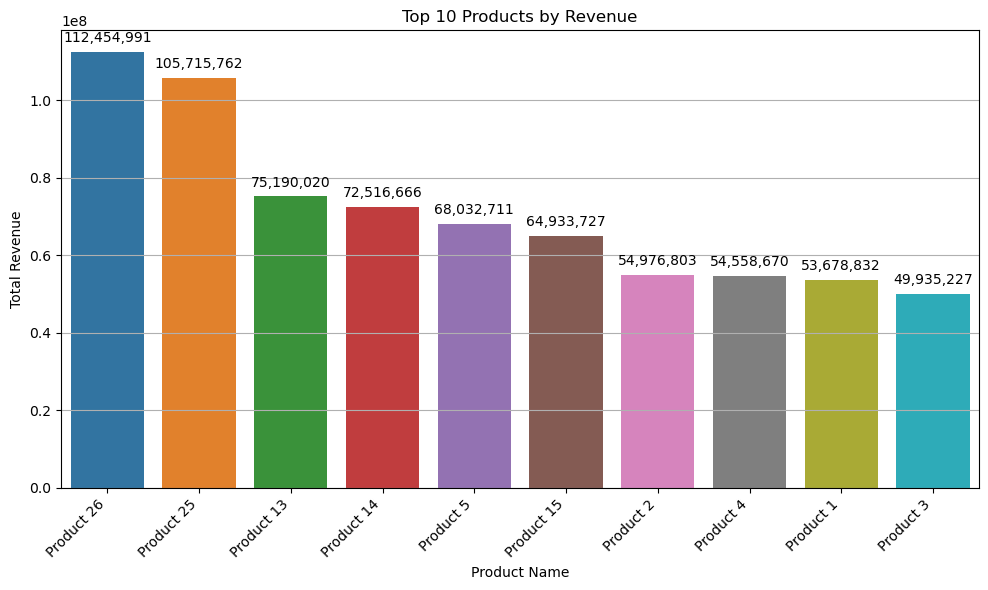

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue by product
top_products = (
    df_new.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_products, x='product_name', y='revenue', palette='tab10')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',               # value format
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


'Bottom 10 Products by Revenue'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\4045376835.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')


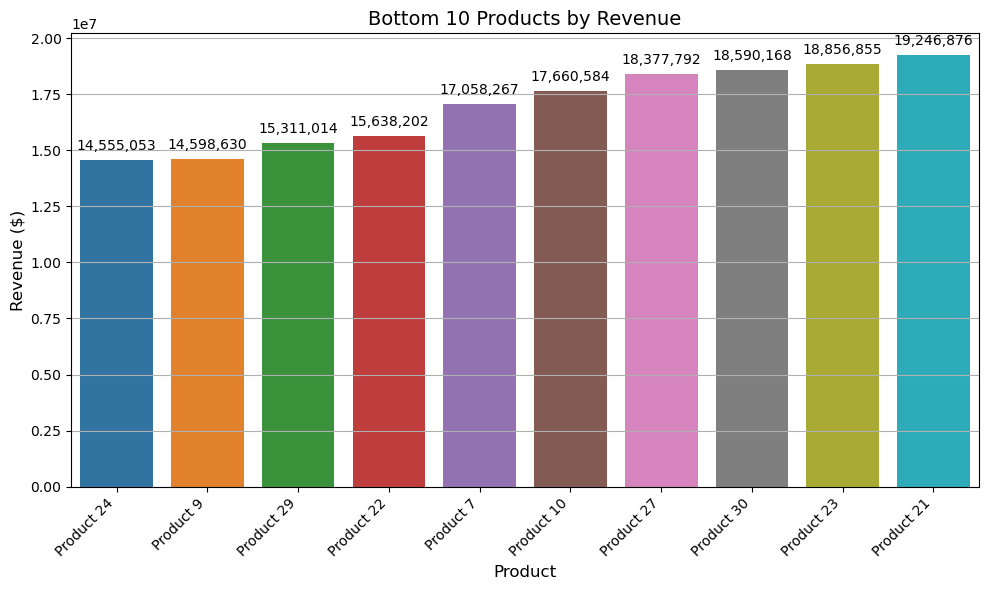

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


"Revenue Share by Channel"

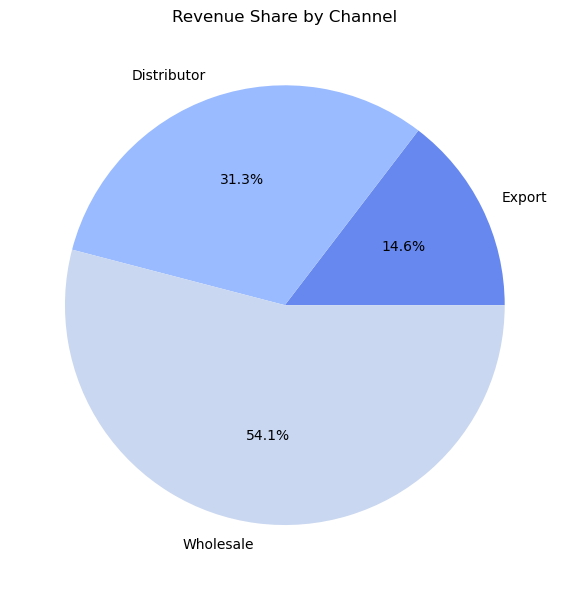

In [74]:
import matplotlib.pyplot as plt

sales_by_channel = (
    df.groupby('channel')['revenue']
      .sum()
      .sort_values(ascending=True)
)

plt.figure(figsize=(6, 6))
plt.pie(
    sales_by_channel.values,
    labels=sales_by_channel.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title("Revenue Share by Channel")
plt.tight_layout()
plt.show()


Average Order Value Distribution

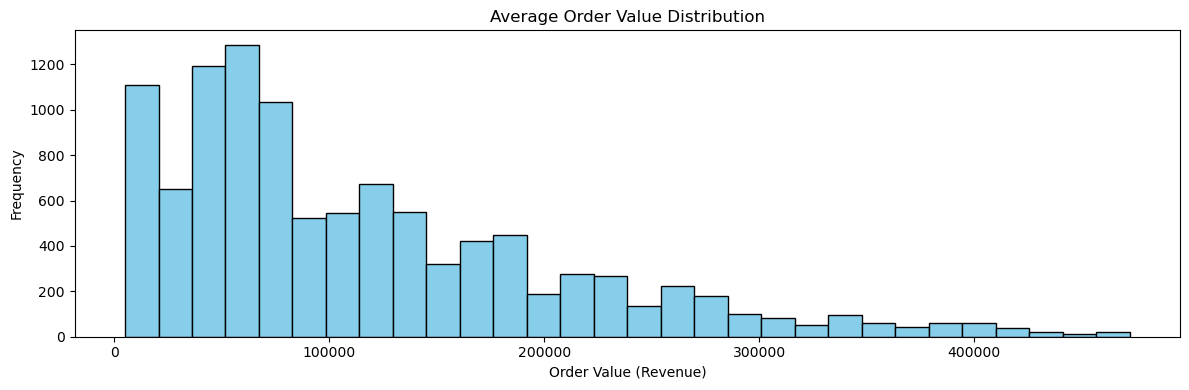

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

aov = df.groupby('order_name')['revenue'].sum()
plt.figure(figsize=(12, 4))

plt.hist(
    aov,
    bins=30,
    color='skyblue',
    edgecolor='black'
)

plt.title("Average Order Value Distribution")
plt.xlabel("Order Value (Revenue)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Unit Price Distribution per Product
Top 10 States By revenue and Order count
Avg Profit MArgin by channel
Top & Bottom 10 Customers by revenue
customer segmentation: revenue vs profit margin
correlation Heatmap

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\875573580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


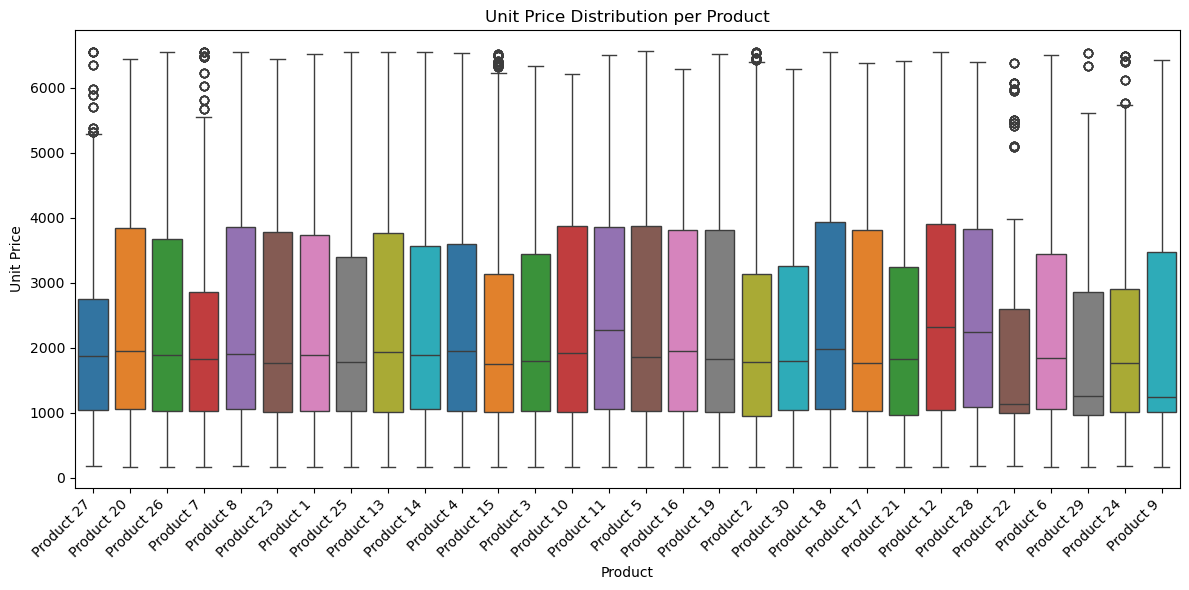

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    palette='tab10'
)

plt.title("Unit Price Distribution per Product")
plt.xlabel("Product")
plt.ylabel("Unit Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\73622727.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary, x='state_name', y='total_revenue', ax=axes[0], palette='tab10')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\73622727.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary, x='state_name', y='order_count', ax=axes[1],palette='tab10')


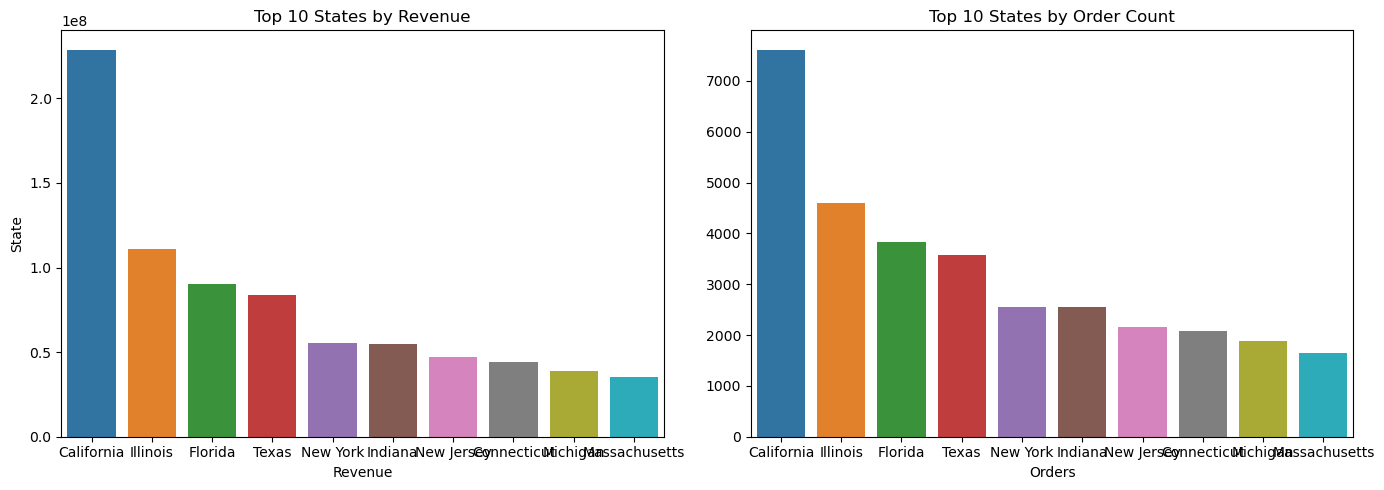

In [92]:
#Top 10 States By revenue and Order count
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

state_summary = (
    df.groupby('state_name')
      .agg(
          total_revenue=('revenue', 'sum'),
          order_count=('order_name', 'nunique')
      )
      .sort_values('total_revenue', ascending=False)
      .head(10)
      .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue chart
sns.barplot(data=state_summary, x='state_name', y='total_revenue', ax=axes[0], palette='tab10')
axes[0].set_title("Top 10 States by Revenue")
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("State")

# Order count chart
sns.barplot(data=state_summary, x='state_name', y='order_count', ax=axes[1],palette='tab10')
axes[1].set_title("Top 10 States by Order Count")
axes[1].set_xlabel("Orders")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()





C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\1178983823.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=channel_margin, x='channel', y='profit_margin',palette='tab10')


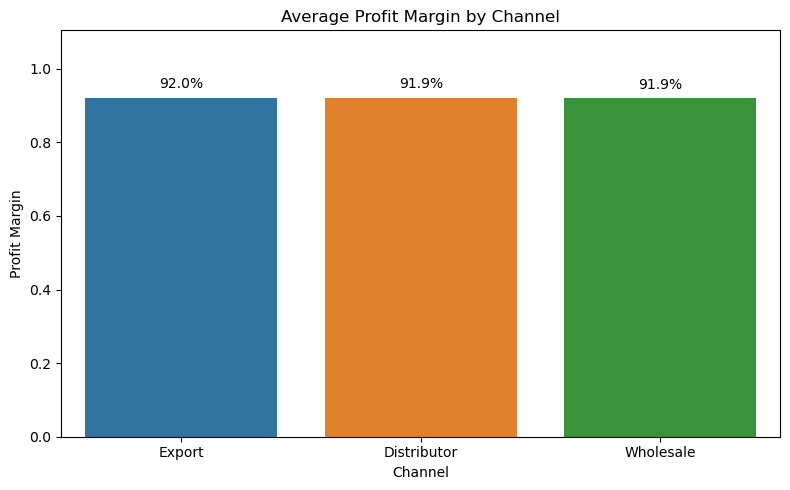

In [93]:
#Avg Profit MArgin by channel
import matplotlib.pyplot as plt
import seaborn as sns
# Create profit column if not already present
df['profit'] = df['revenue'] - df['cost']

# Profit margin
df['profit_margin'] = df['profit'] / df['revenue']

channel_margin = (
    df.groupby('channel')['profit_margin']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=channel_margin, x='channel', y='profit_margin',palette='tab10')

# Add labels as %
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()*100:.1f}%',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Average Profit Margin by Channel")
plt.xlabel("Channel")
plt.ylabel("Profit Margin")
plt.ylim(0, channel_margin['profit_margin'].max() * 1.2)

plt.tight_layout()
plt.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\3716136841.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_customers, x='revenue', y='customer_name_index', ax=axes[0],palette='tab10')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\3716136841.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_customers, x='revenue', y='customer_name_index', ax=axes[1],palette='tab10')


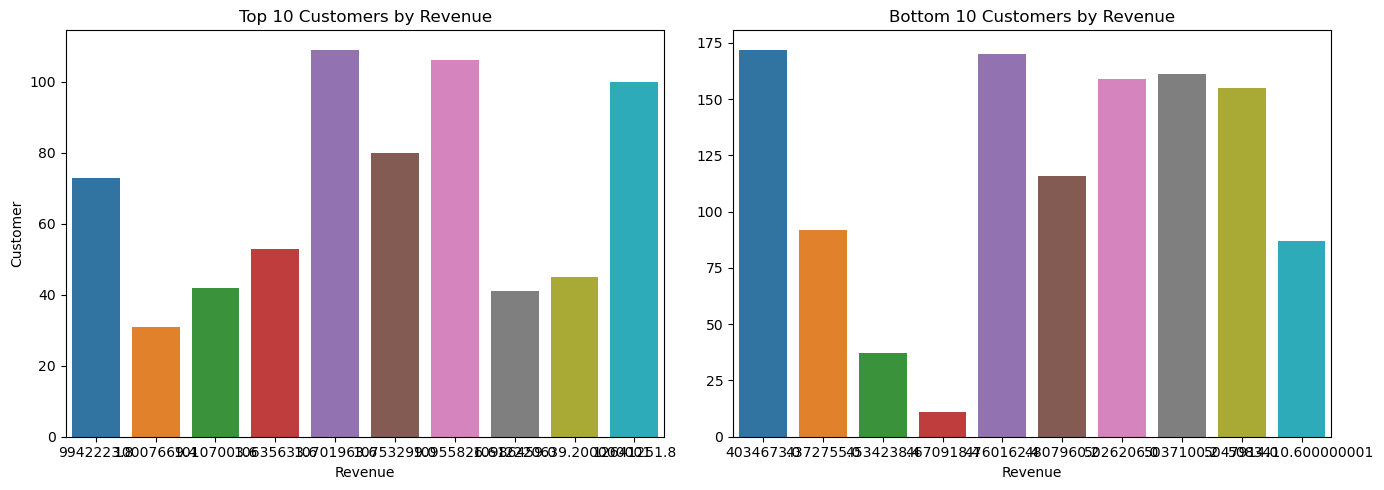

In [96]:
#Top & Bottom 10 Customers by revenue
import matplotlib.pyplot as plt
import seaborn as sns
customer_revenue = (
    df.groupby('customer_name_index')['revenue']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)
top_10_customers = customer_revenue.head(10)
bottom_10_customers = customer_revenue.tail(10).sort_values('revenue')



fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 10
sns.barplot(data=top_10_customers, x='revenue', y='customer_name_index', ax=axes[0],palette='tab10')
axes[0].set_title("Top 10 Customers by Revenue")
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Customer")

# Bottom 10
sns.barplot(data=bottom_10_customers, x='revenue', y='customer_name_index', ax=axes[1],palette='tab10')
axes[1].set_title("Bottom 10 Customers by Revenue")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\345637167.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


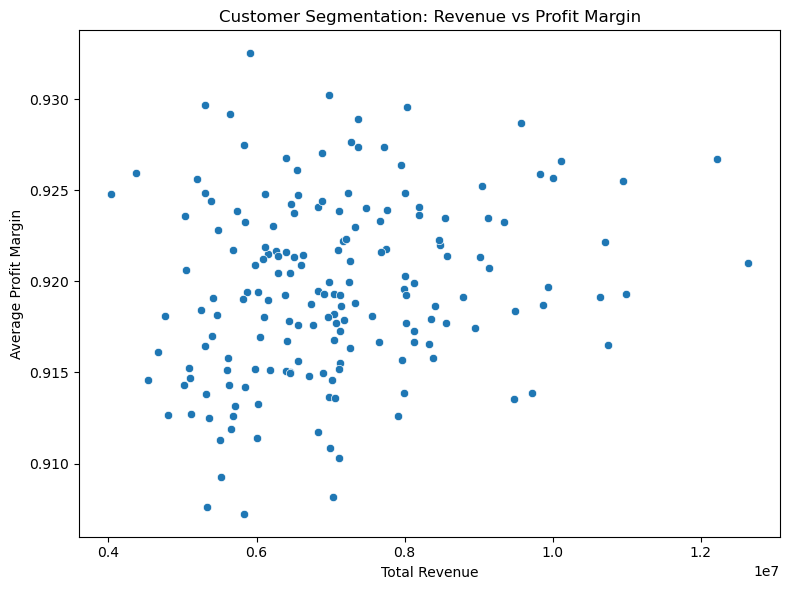

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23012\345637167.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


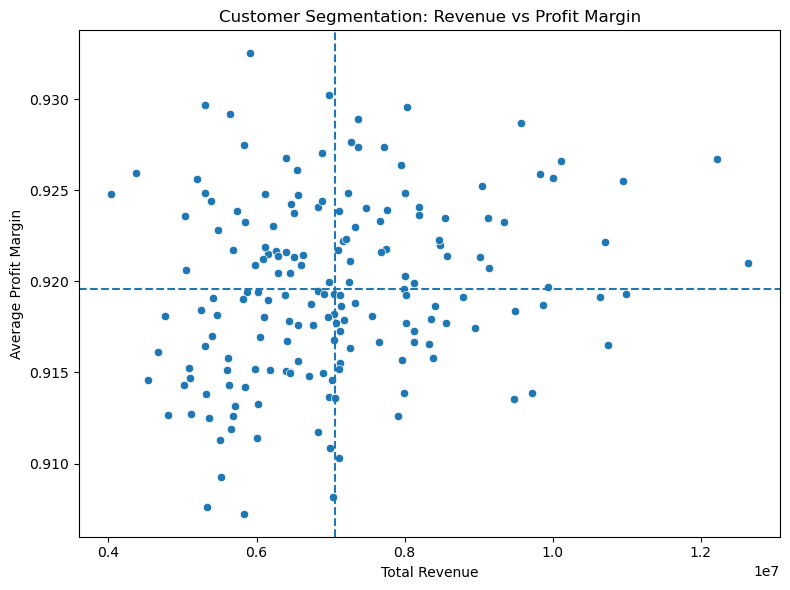

In [99]:
#customer segmentation: revenue vs profit margin
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure profit & margin exist
df['profit'] = df['revenue'] - df['cost']
df['profit_margin'] = df['profit'] / df['revenue']

# Aggregate per customer
customer_seg = (
    df.groupby('customer_name_index')
      .agg(
          total_revenue=('revenue', 'sum'),
          avg_profit_margin=('profit_margin', 'mean')
      )
      .reset_index()
)


plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=customer_seg,
    x='total_revenue',
    y='avg_profit_margin'
)

plt.title("Customer Segmentation: Revenue vs Profit Margin")
plt.xlabel("Total Revenue")
plt.ylabel("Average Profit Margin")

plt.tight_layout()
plt.show()

rev_mean = customer_seg['total_revenue'].mean()
margin_mean = customer_seg['avg_profit_margin'].mean()

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=customer_seg,
    x='total_revenue',
    y='avg_profit_margin'
)

# Quadrant lines
plt.axvline(rev_mean, linestyle='--')
plt.axhline(margin_mean, linestyle='--')

plt.title("Customer Segmentation: Revenue vs Profit Margin")
plt.xlabel("Total Revenue")
plt.ylabel("Average Profit Margin")

plt.tight_layout()
plt.show()



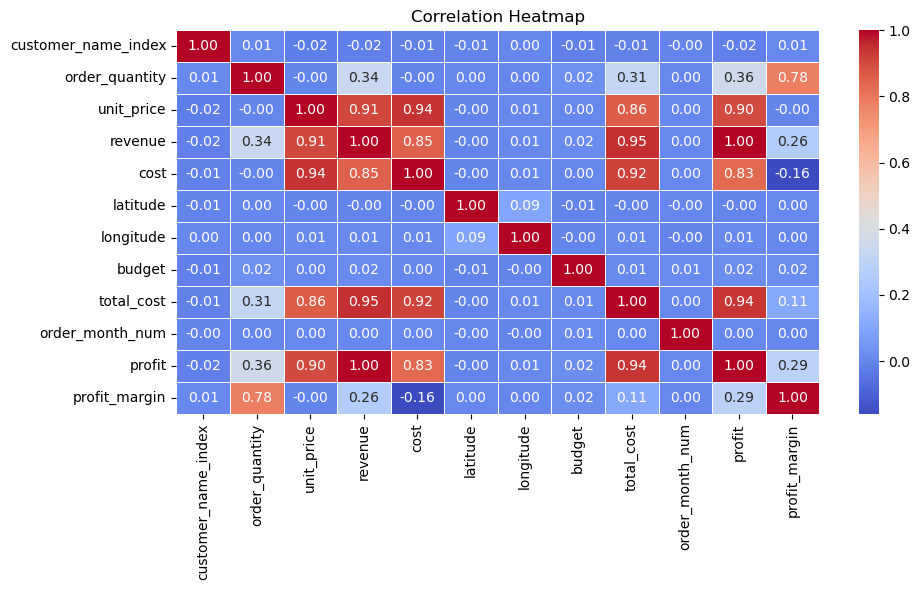

In [100]:
#correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(
    corr_matrix,
    annot=True,        # values show karega
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
